### Курсовой проект по предмету: 
## Теория вероятностей и математическая статистика

#### Тема: Анализ посещаемости сайта "Роспатент" в 2022 году. 

**План:**
1. Описательная статистика
2. Качественные и количественные характеристики данных
3. Применения данных для построения модели линейной регрессии

Данные взяты с сайта
<a href='https://rospatent.gov.ru/ru/about/stat/attendance'>Роспатент</a>):

In [85]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv('Роспатент_2022_V1.0.csv', encoding='cp1251', sep=';')

In [87]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

       Months  Visitors   Views
0     January    118587  456531
1    February    126723  493033
2       March    122327  548167
3       April    117169  526950
4         May     99667  336157
5        June    141272  437626
6        July    106007  350566
7      August    118548  398376
8   September    131191  413205
9     October    138783  444524
10   November    150289  482890
11   December     85461  441659


##### Max. и Min. значения:

In [88]:
print('Максимальное количество посетителей сайта/мес.: ', df['Visitors'].max().round(0))
print('Максимальное количество посещений сайта/мес.: ', df['Views'].max().round(0))

Максимальное количество посетителей сайта/мес.:  150289
Максимальное количество посещений сайта/мес.:  548167


In [89]:
print('Миниальное количество посетителей сайта/мес.: ', df['Visitors'].min().round(0))
print('Миниальное количество посещений сайта/мес.: ', df['Views'].min().round(0))

Миниальное количество посетителей сайта/мес.:  85461
Миниальное количество посещений сайта/мес.:  336157


##### Медиана:

In [90]:
print('Медиана по количеству посетителей сайта: ', df['Visitors'].median().round(0))
print('Медиана по количеству посещений сайта: ', df['Views'].median().round(0))

Медиана по количеству посетителей сайта:  120457.0
Медиана по количеству посещений сайта:  443092.0


##### Мода:

In [91]:
print(df['Visitors'].unique())

[118587 126723 122327 117169  99667 141272 106007 118548 131191 138783
 150289  85461]


In [92]:
print(df['Views'].unique())

[456531 493033 548167 526950 336157 437626 350566 398376 413205 444524
 482890 441659]


Мода не применима, т.к. нет повторяющихся данных!

##### Среднее значение:

In [93]:
print('Среднее количество посетителей сайта: ', df['Visitors'].mean().round(0))
print('Среднее количество посещений сайта: ', df['Views'].mean().round(0))

Среднее количество посетителей сайта:  121335.0
Среднее количество посещений сайта:  444140.0


##### Cреднее квадратичное отклонение:

In [94]:
print('Среднее квадратичное отклонение количества посетителей сайта:', df['Visitors'].std( ).round(0))
print('Среднее квадратичное отклонение количества просмотров сайта:', df['Views'].std( ).round(0))

Среднее квадратичное отклонение количества посетителей сайта: 18319.0
Среднее квадратичное отклонение количества просмотров сайта: 64131.0


##### Дисперсия:

$$Смещённая$$

In [95]:
print('Дисперсия количества посетителей сайта:', df['Visitors'].var(ddof=0).round(0))
print('Дисперсия количества просмотров сайта:', df['Views'].var(ddof=0).round(0))

Дисперсия количества посетителей сайта: 307622854.0
Дисперсия количества просмотров сайта: 3770101030.0


$$Несмещённая$$

In [96]:
print('Несмещённая дисперсия количества посетителей сайта:', df['Visitors'].var(ddof=1).round(0))
print('Несмещённая дисперсия количества просмотров сайта:', df['Views'].var(ddof=1).round(0))

Несмещённая дисперсия количества посетителей сайта: 335588568.0
Несмещённая дисперсия количества просмотров сайта: 4112837487.0


##### Обзор и проверка данных, вычисление квантилий (25%, 50%, 75%):

In [97]:
df.describe()

,Visitors,Views
count,12.000000,12.000000
mean,121335.333333,444140.333333
std,18319.076606,64131.407960
min,85461.000000,336157.000000
25%,114378.500000,409497.750000
50%,120457.000000,443091.500000
75%,133089.000000,485425.750000
max,150289.000000,548167.000000


##### Представление о распределении данных:

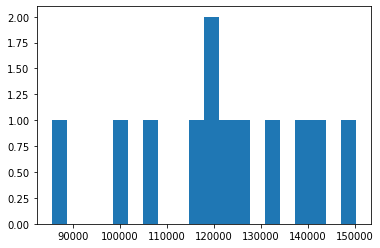

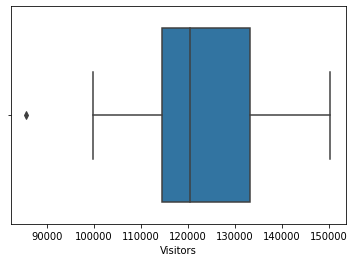

In [98]:
plt.hist(df['Visitors'], bins=20)
plt.show()
sns.boxplot(df['Visitors'], orient='v')
plt.show()

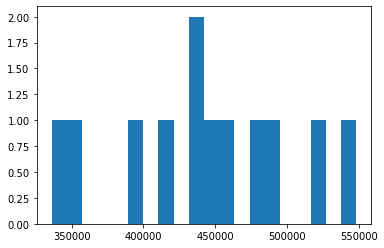

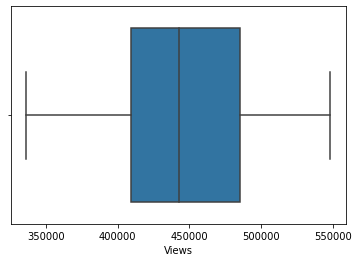

In [99]:
plt.hist(df['Views'], bins = 20)
plt.show()
sns.boxplot(df['Views'], orient='v')
plt.show()

##### Нормальное распределение целевой переменной:

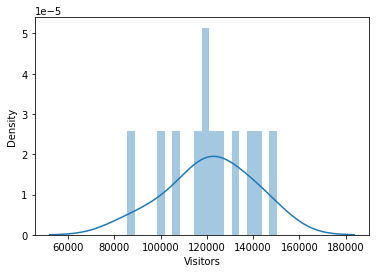

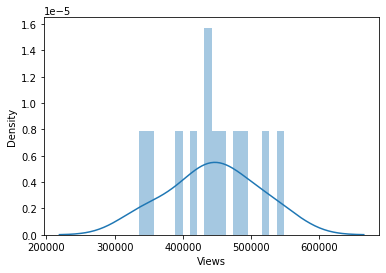

In [100]:
sns.distplot(df['Visitors'], bins=20)
plt.show()
sns.distplot(df['Views'], bins=20)
plt.show()

##### Анализ зависимости:

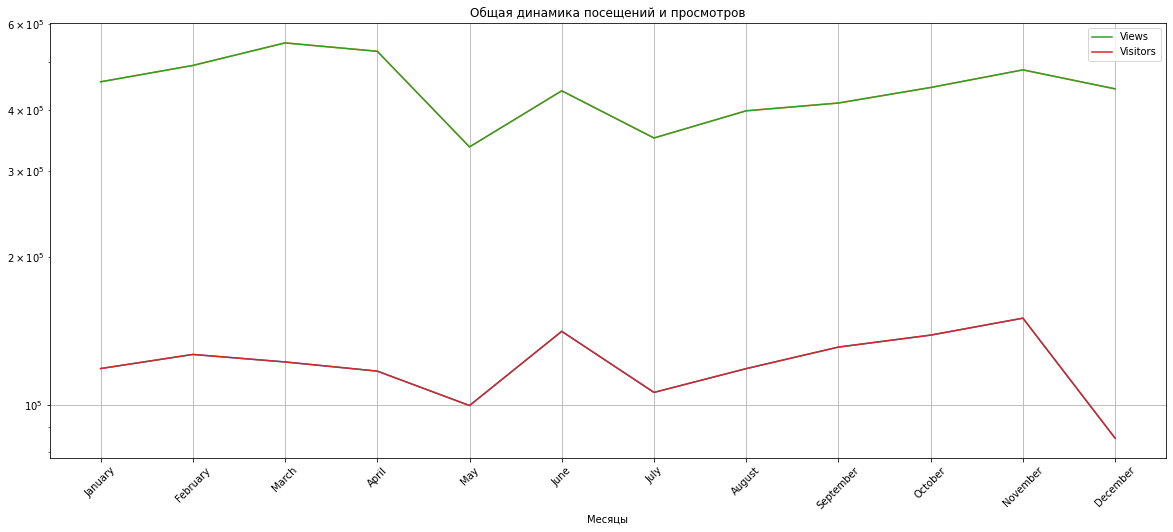

In [101]:
fig = plt.figure(figsize=(20, 8))
plt.plot(df['Months'], df['Visitors'], df['Views'])
plt.yscale(value="log")
plt.title('Общая динамика посещений и просмотров')
plt.xlabel('Месяцы')
plt.xticks(rotation=45)
plt.plot(df['Views'], label='Views')
plt.plot(df['Visitors'], label='Visitors')
plt.legend(loc='upper right')
plt.grid()

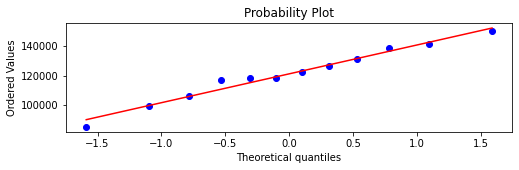

In [102]:
fig = plt.figure(figsize=(8, 2))
res = stats.probplot(df['Visitors'], plot=plt)
plt.show()

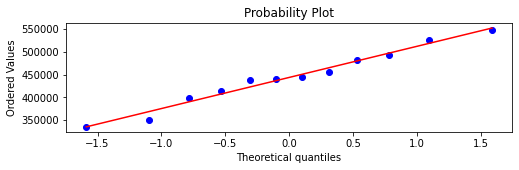

In [103]:
fig = plt.figure(figsize=(8, 2))
res = stats.probplot(df['Views'], plot=plt)
plt.show()

<Figure size 720x720 with 0 Axes>

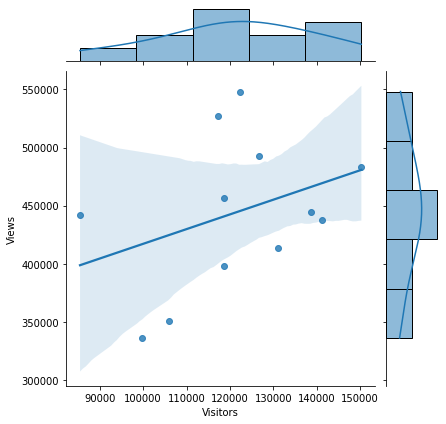

In [104]:
fig = plt.figure(figsize=(10, 10))
grid = sns.jointplot(df['Visitors'], df['Views'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)
plt.show()

##### Корреляционный анализ:

In [105]:
corr_matrix = df.loc[:, ['Visitors', 'Views']].corr()
corr_matrix

,Visitors,Views
Visitors,1.000000,0.361532
Views,0.361532,1.000000


In [106]:
print('Величина коэффициента корреляции: ', corr_matrix.loc['Visitors', 'Views'].round(2))

Величина коэффициента корреляции:  0.36


Корреляция слабая!

##### Ковариационный анализ:

In [107]:
df.cov()

,Visitors,Views
Visitors,3.355886e+08,4.247383e+08
Views,4.247383e+08,4.112837e+09


##### Линейная регрессия:

In [108]:
n = len(df['Months']) # количество наблюдений
x = np.array(df['Visitors'], dtype=np.float64)
y = np.array(df['Views'], dtype=np.float64)

Коэффициенты регрессии $a$ и $b$:

In [109]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

1.2656519214286392

In [110]:
a = np.mean(y) - b * np.mean(x)
a

290572.0355628156

Коэффициент корреляции $r$ от коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:

In [111]:
r = b * np.std(x) / np.std(y)
if r.round(2) == corr_matrix.loc['Visitors', 'Views'].round(2):
    print('Коэффициент корреляции:', r.round(2), True)
else:
    print(False)

Коэффициент корреляции: 0.36 True


Kоэффициент детерминации $R^2$:

In [112]:
R2 = r**2
R2
print('Это означает, что ',(R2*100).round(2),'% вариаций количества просмотров (y) объясняется\n','вариацией фактора (x) — количество посетителей сайта.')

Это означает, что  13.07 % вариаций количества просмотров (y) объясняется
 вариацией фактора (x) — количество посетителей сайта.


Значения, предсказанные моделью данных просмотров:

In [113]:
y_pred = a + b * x
y_pred

array([440661.89996927, 450959.24400202, 445395.43815542, 438867.20554469,
       416715.76561584, 469373.21380688, 424739.9987977 , 440612.53954434,
       456614.17678696, 466223.00617445, 480785.5971824 , 398735.91442003])

Оценка модели с помощью средней ошибки аппроксимации $\overline {A}$:

In [114]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
print('Средняя ошибка апроксимации равна', (A_mean).round(2),'%')

Средняя ошибка апроксимации равна 11.33 %


Так как значение $\overline {A}$ более 10%, но менее 15%, модель лишь условно описывает эмпирические данные. 

Для оценки значимости уравнения регрессии импользуется F-критерий Фишера. Фактическое значение $F$-критерия ($F_{факт}$):

In [115]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
print('Фактическое значение 𝐹-критерия равно', (F_fact).round(2),'%')

Фактическое значение 𝐹-критерия равно 1.5 %


При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 12 - 2 = 10$ табличное значение критерия: $F_{кр} = 4.96$.

Так как $F_{факт} = 1.5 < F_{кр} = 4.96$, уравнение регрессии не может считаться статистически значимым.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента. 

Расчёт доверительных интервалов каждого из показателей. 

При $df = n - 2 = 12 - 2 = 10$ и $\alpha = 0.05$:

(см. <a href='https://statpsy.ru/t-student/t-test-tablica/'>Таблицу критических значений t-критерия Стьюдента</a>):

$$t_{кр} = 2.228$$

Стандартная ошибка $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

In [116]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 62711.986765027184
m_a = 126540.18971626733
m_b = 1.032168588915662


Наблюдаемые значения критерия $t_a$ и $t_b$:

In [117]:
t_a = a / m_a
print(t_a.round(3))

2.296


In [118]:
t_b = b / m_b
print(t_b.round(3))

1.226


Фактические значения t-статистики по отношению к табличному значению:

$$t_a = 2.296 > t_{кр} = 2.228, \; t_b = 1.226 < t_{кр} = 2.228,$$

Расчетный критерий $t_b$ оказался меньше табличного. Следовательно, имеющиеся данные не противоречат гипотезе, но и не доказывают ее!

Рассчит доверительныx интервалов для параметров регрессии $a$ и $b$. Для этого определяется предельная ошибка для каждого показателя ($\Delta_a$ и $\Delta_b$), используя значение $t_{кр}$, равное 2.228 (переменная **t_cr**):

In [119]:
t_cr = 2.228

In [120]:
delta_a = t_cr * m_a
delta_a

281931.5426878436

In [121]:
delta_b = t_cr * m_b
delta_b

2.2996716161040953

Границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [122]:
gamma_a_min = a - delta_a
gamma_a_min

8640.492874971998

In [123]:
gamma_a_max = a + delta_a
gamma_a_max

572503.5782506592

In [124]:
gamma_b_min = b - delta_b
gamma_b_min

-1.034019694675456

In [125]:
gamma_b_max = b + delta_b
gamma_b_max

3.5653235375327346

**Вывод:** с вероятностью $p = 1 - \alpha = 0.95$ параметры $a$ и $b$, находясь в указанных границах, являются статистически значимыми и отличны от нуля.

Поместим исходные и предсказанные данные в датафрейм **df**:

In [126]:
df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,118587.0,456531.0,440661.899969
1,126723.0,493033.0,450959.244002
2,122327.0,548167.0,445395.438155
3,117169.0,526950.0,438867.205545
4,99667.0,336157.0,416715.765616
5,141272.0,437626.0,469373.213807
6,106007.0,350566.0,424739.998798
7,118548.0,398376.0,440612.539544
8,131191.0,413205.0,456614.176787
9,138783.0,444524.0,466223.006174


Сортировка значений по полю **x**:

In [127]:
df = df.sort_values('x')
df

,x,y,y_pred
11,85461.0,441659.0,398735.914420
4,99667.0,336157.0,416715.765616
6,106007.0,350566.0,424739.998798
3,117169.0,526950.0,438867.205545
7,118548.0,398376.0,440612.539544
0,118587.0,456531.0,440661.899969
2,122327.0,548167.0,445395.438155
1,126723.0,493033.0,450959.244002
8,131191.0,413205.0,456614.176787
9,138783.0,444524.0,466223.006174


График исходных данных и теоретическая прямая по уравнению регрессии:

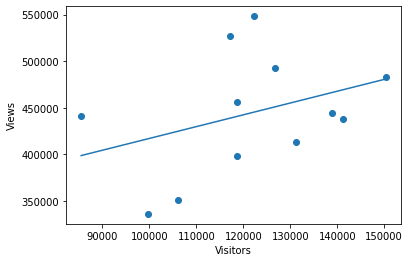

In [128]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Visitors')
plt.ylabel('Views')
plt.show()